# How to configurate environment?
```
This task was made on Athena.
To configure my environment I used:
- srun --time=2:00:00 --mem=8G --ntasks 1 --gres=gpu:1 --partition=plgrid-gpu-a100 --account
   =plglscclass24-gpu-a100 --pty /bin/bash
- conda config --add envs_dirs ${SCRATCH}/.conda/envs 
- conda config --add pkgs_dirs ${SCRATCH}/.conda/pkgs
- module load Miniconda3
- eval "$(conda shell.bash hook)" 
- conda activate $PLG_GROUPS_STORAGE/plgglscclass/.conda/envs/tf2-gpu
- conda create --name lab2 --clone $PLG_GROUPS_STORAGE/plgglscclass/.conda/envs/tf2-gpu
- conda activate lab2
- conda install -c conda-forge cupy pandas matplotlib numpy
- cp $PLG_GROUPS_STORAGE/plgglscclass/lsc_lab02.ipynb $HOME
- jupyter notebook --no-browser --port=2324 --ip=t0042
```

# Task 2 - Data Analysis

In [21]:
import matplotlib.pyplot as plt
import json
from datetime import datetime
from collections import Counter
import re

In [22]:
file_path = '/net/pr2/projects/plgrid/plgglscclass/yelp-dataset/yelp_academic_dataset_tip.json'

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
print("Head:")
print(df.head())
print("Tail:")
print(df.tail())

Head:
                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
Tail:
                       user_id             business_id  \
908910  eYodOTF8pkqKPz

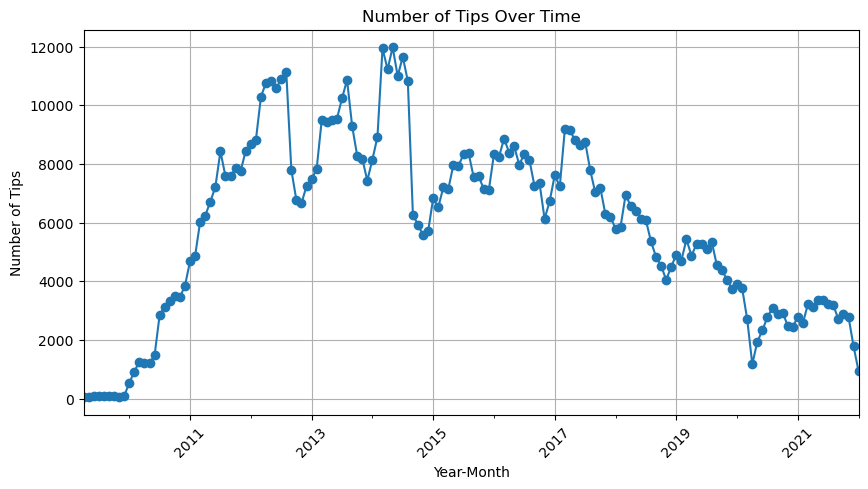

In [23]:
plt.figure(figsize=(10, 5))
df['year_month'] = df['date'].dt.to_period('M')
df_grouped = df.groupby('year_month').size()
df_grouped.plot(kind='line', marker='o', title='Number of Tips Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tips')
plt.xticks(rotation=45)
plt.grid()
plt.show()

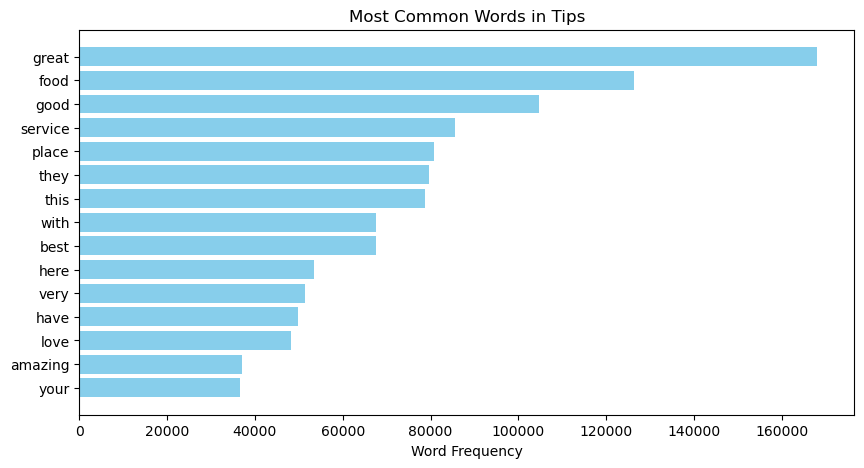

In [24]:
all_words = ' '.join(df['text']).lower()
words = re.findall(r'\b\w{4,}\b', all_words)
word_freq = Counter(words)
common_words = word_freq.most_common(15)

plt.figure(figsize=(10, 5))
plt.barh([word[0] for word in common_words], [word[1] for word in common_words], color='skyblue')
plt.xlabel('Word Frequency')
plt.title('Most Common Words in Tips')
plt.gca().invert_yaxis()
plt.show()

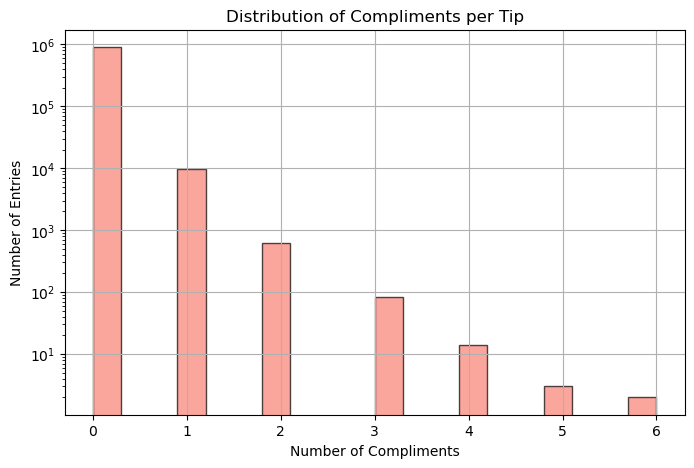

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['compliment_count'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.yscale('log')  # Log scale for better readability
plt.xlabel('Number of Compliments')
plt.ylabel('Number of Entries')
plt.title('Distribution of Compliments per Tip')
plt.grid()
plt.show()

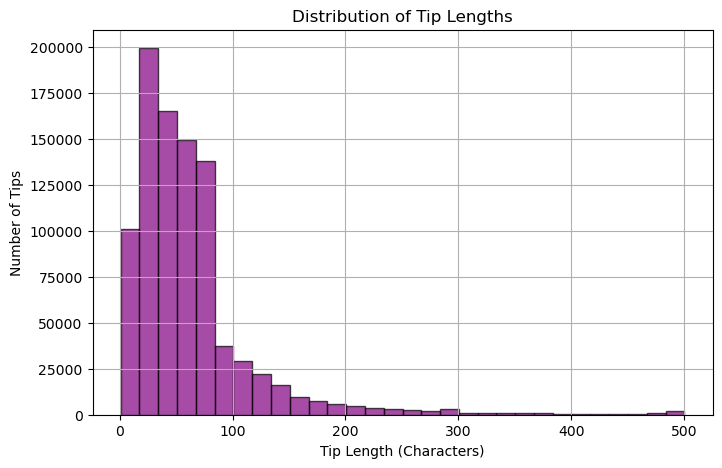

In [26]:
plt.figure(figsize=(8, 5))
df['text_length'] = df['text'].apply(len)
plt.hist(df['text_length'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Tip Length (Characters)')
plt.ylabel('Number of Tips')
plt.title('Distribution of Tip Lengths')
plt.grid()
plt.show()

In [27]:
active_users = df['user_id'].value_counts().head(5)
print("Most Active Users:")
print(active_users)

Most Active Users:
user_id
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
Name: count, dtype: int64


In [28]:
print(df.describe())

                                date  compliment_count    text_length
count                         908915     908915.000000  908915.000000
mean   2015-06-14 10:13:53.302817280          0.012525      62.580226
min              2009-04-16 13:11:49          0.000000       1.000000
25%       2013-01-26 01:18:02.500000          0.000000      28.000000
50%              2015-03-15 01:10:25          0.000000      49.000000
75%       2017-08-02 06:19:55.500000          0.000000      76.000000
max              2022-01-19 20:38:55          6.000000     500.000000
std                              NaN          0.120763      57.828705
